<a href="https://colab.research.google.com/github/ccal2/dataScienceProject/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Esse projeto foi desenvolvido utilizando um *dataset* que contém dados relacionados à série de livros *A Song of Ice and Fire* (As Crônicas de Gelo e Fogo), mais conhecida pelo título do seu primeiro livro: *A Game of Thrones* (A Guerra dos Tronos).

O arquivo `battles.csv` foi baixados diretamente de um *dataset* do [kaggle](https://www.kaggle.com/mylesoneill/game-of-thrones) e possui informações de várias batalhas que ocorrem durante a história.

# Setup

**Lembre-se de dar upload do arquivo `battles.csv`.**

In [1]:
#pip install fancyimpute

In [2]:
import pandas as pd
import numpy as np

In [3]:
battles = pd.read_csv('battles.csv')

# Pré-processamento

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
# (linhas, colunas)
battles.shape

(38, 25)

## Remoção de `battle_number`

A coluna `battle_number` serve como um identificador único para a tabela, mas na verdade ela é dispensável porque já temos um *index* e todos os valores da coluna `name` são únicos.

In [6]:
battles['name'].describe()

count                               38
unique                              38
top       Battle of the Shield Islands
freq                                 1
Name: name, dtype: object

In [7]:
battles.drop(columns=['battle_number'], inplace=True)
battles.head()

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


## Expansão de `attacker_commander` e `defender_commander`

As colunas `attacker_commander` e `defender_commander` possuem vários nomes separados por vírgulas. Vamos expandir essas colunas para ficar com um nome por coluna:

In [8]:
# separar nomes de 'attacker_commander'
split_attacker_commanders = battles["attacker_commander"].str.split(",", expand=True)
split_attacker_commanders.head()

,0,1,2,3,4,5
0,Jaime Lannister,None,None,None,None,None
1,Gregor Clegane,None,None,None,None,None
2,Jaime Lannister,Andros Brax,None,None,None,None
3,Roose Bolton,Wylis Manderly,Medger Cerwyn,Harrion Karstark,Halys Hornwood,None
4,Robb Stark,Brynden Tully,None,None,None,None


In [9]:
# separar nomes de 'defender_commander'
split_defender_commanders = battles["defender_commander"].str.split(",", expand=True)
split_defender_commanders.head()

,0,1,2,3,4,5,6
0,Clement Piper,Vance,None,None,None,None,None
1,Beric Dondarrion,None,None,None,None,None,None
2,Edmure Tully,Tytos Blackwood,None,None,None,None,None
3,Tywin Lannister,Gregor Clegane,Kevan Lannister,Addam Marbrand,None,None,None
4,Jaime Lannister,None,None,None,None,None,None


In [10]:
# remover colunas 'attacker_commander' e 'defender_commander'
battles = battles.drop(columns=['attacker_commander', 'defender_commander'])

# adicionar novas colunas de 'attacker_commander_x'
battles['attacker_commander_1'] = split_attacker_commanders[0]
battles['attacker_commander_2'] = split_attacker_commanders[1]
battles['attacker_commander_3'] = split_attacker_commanders[2]
battles['attacker_commander_4'] = split_attacker_commanders[3]
battles['attacker_commander_5'] = split_attacker_commanders[4]
battles['attacker_commander_6'] = split_attacker_commanders[5]

# adicionar novas colunas de 'defender_commander_x'
battles['defender_commander_1'] = split_defender_commanders[0]
battles['defender_commander_2'] = split_defender_commanders[1]
battles['defender_commander_3'] = split_defender_commanders[2]
battles['defender_commander_4'] = split_defender_commanders[3]
battles['defender_commander_5'] = split_defender_commanders[4]
battles['defender_commander_6'] = split_defender_commanders[5]
battles['defender_commander_7'] = split_defender_commanders[6]

battles.head()

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,note,attacker_commander_1,attacker_commander_2,attacker_commander_3,attacker_commander_4,attacker_commander_5,attacker_commander_6,defender_commander_1,defender_commander_2,defender_commander_3,defender_commander_4,defender_commander_5,defender_commander_6,defender_commander_7
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,NaN,Jaime Lannister,None,None,None,None,None,Clement Piper,Vance,None,None,None,None,None
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,NaN,Gregor Clegane,None,None,None,None,None,Beric Dondarrion,None,None,None,None,None,None
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,NaN,Jaime Lannister,Andros Brax,None,None,None,None,Edmure Tully,Tytos Blackwood,None,None,None,None,None
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,NaN,Roose Bolton,Wylis Manderly,Medger Cerwyn,Harrion Karstark,Halys Hornwood,None,Tywin Lannister,Gregor Clegane,Kevan Lannister,Addam Marbrand,None,None,None
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,NaN,Robb Stark,Brynden Tully,None,None,None,None,Jaime Lannister,None,None,None,None,None,None


## Tratamentos de dados ausentes I

Só pelo último `head` podemos ver que algumas colunas parecem ter muitos dados nulos. Por isso vamos fazer um primeiro tratamento de dados ausentes antes mesmo da definição de tipos. Dessa forma, evitamos definir um tipo para uma coluna que acabaria sendo removida depois por falta de dados suficientes.

In [11]:
# calcular porcentagem de linhas nulas por coluna
(battles.isnull().sum() / len(battles)) * 100

name                      0.000000
year                      0.000000
attacker_king             5.263158
defender_king             7.894737
attacker_1                0.000000
attacker_2               73.684211
attacker_3               92.105263
attacker_4               94.736842
defender_1                2.631579
defender_2               94.736842
defender_3              100.000000
defender_4              100.000000
attacker_outcome          2.631579
battle_type               2.631579
major_death               2.631579
major_capture             2.631579
attacker_size            36.842105
defender_size            50.000000
summer                    2.631579
location                  2.631579
region                    0.000000
note                     86.842105
attacker_commander_1      2.631579
attacker_commander_2     42.105263
attacker_commander_3     76.315789
attacker_commander_4     89.473684
attacker_commander_5     89.473684
attacker_commander_6     94.736842
defender_commander_1

Existem várias colunas com muitos dados nulos. Principalmente colunas que possuem informações secundárias relacionadas a outras colunas, como `XXXX_2`, `XXXX_3`, ... Uma vez que a informação principal está na coluna `XXXX_1` e as demais colunas possuem muitos valores nulos, podemos remover essas colunas secundárias.

Em vez de remover as colunas uma por uma, vamos utilizar um `treshold` para remover a maioria delas de uma só vez de acordo com a sua porcentagem de valores não nulos. O valor esolhido para o `treshold` foi de 50% das linhas da tabela porque um valor maior iria remover também a coluna `defender_size`, que pode ser importante para a análise das batalhas.

In [12]:
# remover as colunas com menos de 50% dos valores não nulos
battles = battles.dropna(thresh=0.5*len(battles), axis='columns')
battles.head()

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,attacker_commander_2,defender_commander_1
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,Jaime Lannister,None,Clement Piper
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,Gregor Clegane,None,Beric Dondarrion
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,Jaime Lannister,Andros Brax,Edmure Tully
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,Roose Bolton,Wylis Manderly,Tywin Lannister
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,Robb Stark,Brynden Tully,Jaime Lannister


In [13]:
# porcentagem de linhas nulas por coluna após remoção
(battles.isnull().sum() / len(battles)) * 100

name                     0.000000
year                     0.000000
attacker_king            5.263158
defender_king            7.894737
attacker_1               0.000000
defender_1               2.631579
attacker_outcome         2.631579
battle_type              2.631579
major_death              2.631579
major_capture            2.631579
attacker_size           36.842105
defender_size           50.000000
summer                   2.631579
location                 2.631579
region                   0.000000
attacker_commander_1     2.631579
attacker_commander_2    42.105263
defender_commander_1    26.315789
dtype: float64

Como comentado anteriormente, `attacker_commander_2` é um dado secundário, que serve para complementar `attacker_commander_1`. Por não ser tão importante e apresentar 42% dos dados nulos, vamos remover essa coluna também.

In [14]:
battles.drop(columns=['attacker_commander_2'], inplace=True)
battles.head()

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,Jaime Lannister,Clement Piper
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,Gregor Clegane,Beric Dondarrion
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,Jaime Lannister,Edmure Tully
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,Roose Bolton,Tywin Lannister
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,Robb Stark,Jaime Lannister


## Definição de tipos

In [15]:
battles.dtypes

name                     object
year                      int64
attacker_king            object
defender_king            object
attacker_1               object
defender_1               object
attacker_outcome         object
battle_type              object
major_death             float64
major_capture           float64
attacker_size           float64
defender_size           float64
summer                  float64
location                 object
region                   object
attacker_commander_1     object
defender_commander_1     object
dtype: object

In [16]:
battles['year'].describe()

count     38.000000
mean     299.105263
std        0.689280
min      298.000000
25%      299.000000
50%      299.000000
75%      300.000000
max      300.000000
Name: year, dtype: float64

In [17]:
battles['year'].unique()

array([298, 299, 300])

Apesar da coluna `year` representar um dado de tempo, ele é categórico porque só tem 3 valores distintos para as 38 linhas do *dataset*.

In [18]:
# ajustar os tipos dos dados
battles['name'] = battles['name'].astype('category')
battles['year'] = battles['year'].astype('category')
battles['attacker_king'] = battles['attacker_king'].astype('category')
battles['defender_king'] = battles['defender_king'].astype('category')
battles['attacker_1'] = battles['attacker_1'].astype('category')
battles['defender_1'] = battles['defender_1'].astype('category')
battles['attacker_outcome'] = battles['attacker_outcome'].astype('category')
battles['battle_type'] = battles['battle_type'].astype('category')
battles['major_death'] = battles['major_death'].astype('category')
battles['major_capture'] = battles['major_capture'].astype('category')
battles['summer'] = battles['summer'].astype('category')
battles['location'] = battles['location'].astype('category')
battles['region'] = battles['region'].astype('category')
battles['attacker_commander_1'] = battles['attacker_commander_1'].astype('category')
battles['defender_commander_1'] = battles['defender_commander_1'].astype('category')

battles.dtypes

name                    category
year                    category
attacker_king           category
defender_king           category
attacker_1              category
defender_1              category
attacker_outcome        category
battle_type             category
major_death             category
major_capture           category
attacker_size            float64
defender_size            float64
summer                  category
location                category
region                  category
attacker_commander_1    category
defender_commander_1    category
dtype: object

## Tratamento de dados ausentes II

In [19]:
battles.isnull().sum()

name                     0
year                     0
attacker_king            2
defender_king            3
attacker_1               0
defender_1               1
attacker_outcome         1
battle_type              1
major_death              1
major_capture            1
attacker_size           14
defender_size           19
summer                   1
location                 1
region                   0
attacker_commander_1     1
defender_commander_1    10
dtype: int64

Primeiro vamos tratar as colunas com apenas 1 dado ausente e que sabemos que tem relação com alguma outra coluna.

### `summer`

Na história, a passagem das estações é bem diferente da realidade. As estações não mudam com uma frequência constante e **cada estação dura anos**. Logo, podemos utilizar as batalhas do mesmo ano para decidir qual valor imputar na coluna `summer`.

In [20]:
battles['summer'] = battles['summer'].cat.codes
non_null_summer_battles = battles[battles['summer'] != -1]

In [21]:
non_null_summer_battles.groupby(['year'])['summer'].mean()

year
298    1
299    1
300    0
Name: summer, dtype: int8

In [22]:
battles.loc[battles['summer'] == -1]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
23,Battle of the Ruby Ford,299,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Stark,win,pitched battle,0.0,0.0,NaN,6000.0,-1,Ruby Ford,The Riverlands,Gregor Clegane,Roose Bolton


In [23]:
battles.loc[battles['summer'] == -1, ['year']]['year'] = 1
battles['summer'].isnull().sum()

0

### `location`

In [24]:
battles['location'].isnull().sum()

1

In [25]:
battles.loc[battles['location'].isnull()]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
22,Battle of the Burning Septry,299,NaN,NaN,Brotherhood without Banners,Brave Companions,win,pitched battle,0.0,0.0,NaN,NaN,1,NaN,The Riverlands,NaN,NaN


Como essa linha possui muitos dados nulos, é melhor removê-la

In [26]:
battles.drop(index=battles.loc[battles['location'].isnull()].index, inplace=True)
battles['location'].isnull().sum()

0

Obs: Remover essa linha acaba removendo também a única instância com `attacker_commander_1` nulo

In [27]:
battles['attacker_commander_1'].isnull().sum()

0

In [28]:
# resetar o index após remover uma linha
battles.reset_index(drop=True, inplace=True)

### `attacker_king` e `defender_king`

In [29]:
print('attacker_king: ', battles['attacker_king'].isnull().sum())
print('defender_king: ', battles['defender_king'].isnull().sum())

attacker_king:  1
defender_king:  2


In [30]:
battles.loc[battles['attacker_king'].isnull() | battles['defender_king'].isnull()]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
23,Retaking of Harrenhal,299,Joffrey/Tommen Baratheon,NaN,Lannister,Brave Companions,win,pitched battle,1.0,0.0,NaN,NaN,1,Harrenhal,The Riverlands,Gregor Clegane,Vargo Hoat
28,Sack of Saltpans,300,NaN,NaN,Brave Companions,NaN,win,razing,0.0,0.0,NaN,NaN,0,Saltpans,The Riverlands,Rorge,NaN


A 'Brotherhood without Banners' e os 'Brave Companions' não servem a nenhum rei, portanto não faz sentido imputar algum dado das categorias de `attacker_king` e `defender_king` para essas batalhas. Para tratar esses valores nulos, vamos criar uma nova categoria para essas colunas que represente essa falta de rei.

In [31]:
battles['attacker_king'].cat.add_categories(['None'], inplace=True)
battles['attacker_king'].fillna('None', inplace=True)
battles['defender_king'].cat.add_categories(['None'], inplace=True)
battles['defender_king'].fillna('None', inplace=True)

In [32]:
print('attacker_king: ', battles['attacker_king'].isnull().sum())
print('defender_king: ', battles['defender_king'].isnull().sum())

attacker_king:  0
defender_king:  0


### `defender_1`

In [33]:
battles['defender_1'].isnull().sum()

1

In [34]:
battles.loc[battles['defender_1'].isnull()]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
28,Sack of Saltpans,300,None,None,Brave Companions,NaN,win,razing,0.0,0.0,NaN,NaN,0,Saltpans,The Riverlands,Rorge,NaN


Essa batalha não foi direcionada a nenhum reinado específico, então vamos apenas atribuir uma nova categoria (None).

In [35]:
battles['defender_1'].cat.add_categories(['None'], inplace=True)
battles['defender_1'].fillna('None', inplace=True)

In [36]:
battles['defender_1'].isnull().sum()

0

### `battle_type`

In [37]:
battles['battle_type'].isnull().sum()

1

In [38]:
battles.loc[battles['battle_type'].isnull()]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
36,Siege of Winterfell,300,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Bolton,NaN,NaN,NaN,NaN,5000.0,8000.0,0,Winterfell,The North,Stannis Baratheon,Roose Bolton


In [39]:
battles['battle_type'].cat.categories.tolist()

['ambush', 'pitched battle', 'razing', 'siege']

Pelo nome da batalha podemos ver que se trata de um cerco (*siege*). E esse é um tipo de batalha que já existe nas categorias, então vamos usar esse valor.

In [40]:
battles['battle_type'].fillna('siege', inplace=True)

In [41]:
battles['battle_type'].isnull().sum()

0

### Valores booleanos com apenas uma linha nula (`attacker_outcome`, `major_death` e  `major_capture`)

In [42]:
print('attacker_outcome: ', battles['attacker_outcome'].isnull().sum())
print('major_death: ', battles['major_death'].isnull().sum())
print('major_capture: ', battles['major_capture'].isnull().sum())

attacker_outcome:  1
major_death:  1
major_capture:  1


In [43]:
battles.loc[battles['attacker_outcome'].isnull() | battles['major_death'].isnull() | battles['major_capture'].isnull()]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
36,Siege of Winterfell,300,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Bolton,NaN,siege,NaN,NaN,5000.0,8000.0,0,Winterfell,The North,Stannis Baratheon,Roose Bolton


In [44]:
battles['attacker_outcome'] = battles['attacker_outcome'].cat.codes
battles['major_death'] = battles['major_death'].cat.codes
battles['major_capture'] = battles['major_capture'].cat.codes

Para valores booleanos, vamos imputar ou 0 ou 1.

In [45]:
# 'attacker_outcome' = 0
battles2 = battles.copy()
mean_before =  battles2['attacker_outcome'].mean()
median_before = battles2['attacker_outcome'].median()
mode = battles2['attacker_outcome'].mode()

battles2.loc[battles2['attacker_outcome'] == -1, ['attacker_outcome']] = 0

mean_after =  battles2['attacker_outcome'].mean()
median_after = battles2['attacker_outcome'].median()
print('mean: ', mean_before, ' -> ', mean_after)
print('median: ', median_before, ' -> ', median_after)
print('mode: ', mode)

mean:  0.8108108108108109  ->  0.8378378378378378
median:  1.0  ->  1.0
mode:  0    1
dtype: int8


In [46]:
# 'attacker_outcome' = 1
battles3 = battles.copy()
mean_before =  battles3['attacker_outcome'].mean()
median_before = battles3['attacker_outcome'].median()
mode = battles3['attacker_outcome'].mode()

battles3.loc[battles3['attacker_outcome'] == -1, ['attacker_outcome']] = 1

mean_after =  battles3['attacker_outcome'].mean()
median_after = battles3['attacker_outcome'].median()
print('mean: ', mean_before, ' -> ', mean_after)
print('median: ', median_before, ' -> ', median_after)
print('mode: ', mode)

mean:  0.8108108108108109  ->  0.8648648648648649
median:  1.0  ->  1.0
mode:  0    1
dtype: int8


Para `attacker_outcome`, o valor que mudou menos o valor da média foi 0, então vamos usá-lo.

In [47]:
battles = battles2

In [48]:
# 'major_death' = 0
battles2 = battles.copy()
mean_before =  battles2['major_death'].mean()
median_before = battles2['major_death'].median()
mode = battles2['major_death'].mode()

battles2.loc[battles2['major_death'] == -1, ['major_death']] = 0

mean_after =  battles2['major_death'].mean()
median_after = battles2['major_death'].median()
print('mean: ', mean_before, ' -> ', mean_after)
print('median: ', median_before, ' -> ', median_after)
print('mode: ', mode)

mean:  0.32432432432432434  ->  0.35135135135135137
median:  0.0  ->  0.0
mode:  0    0
dtype: int8


In [49]:
# 'major_death' = 1
battles3 = battles.copy()
mean_before =  battles3['major_death'].mean()
median_before = battles3['major_death'].median()
mode = battles3['major_death'].mode()

battles3.loc[battles3['major_death'] == -1, ['major_death']] = 1

mean_after =  battles3['major_death'].mean()
median_after = battles3['major_death'].median()
print('mean: ', mean_before, ' -> ', mean_after)
print('median: ', median_before, ' -> ', median_after)
print('mode: ', mode)

mean:  0.32432432432432434  ->  0.3783783783783784
median:  0.0  ->  0.0
mode:  0    0
dtype: int8


Para `major_death`, o valor que mudou menos o valor da média também foi 0.

In [50]:
battles = battles2

In [51]:
# 'major_capture' = 0
battles2 = battles.copy()
mean_before =  battles2['major_capture'].mean()
median_before = battles2['major_capture'].median()
mode = battles2['major_capture'].mode()

battles2.loc[battles2['major_capture'] == -1, ['major_capture']] = 0

mean_after =  battles2['major_capture'].mean()
median_after = battles2['major_capture'].median()
print('mean: ', mean_before, ' -> ', mean_after)
print('median: ', median_before, ' -> ', median_after)
print('mode: ', mode)

mean:  0.2702702702702703  ->  0.2972972972972973
median:  0.0  ->  0.0
mode:  0    0
dtype: int8


In [52]:
# 'major_capture' = 1
battles3 = battles.copy()
mean_before =  battles3['major_capture'].mean()
median_before = battles3['major_capture'].median()
mode = battles3['major_capture'].mode()

battles3.loc[battles3['major_capture'] == -1, ['major_capture']] = 1

mean_after =  battles3['major_capture'].mean()
median_after = battles3['major_capture'].median()
print('mean: ', mean_before, ' -> ', mean_after)
print('median: ', median_before, ' -> ', median_after)
print('mode: ', mode)

mean:  0.2702702702702703  ->  0.32432432432432434
median:  0.0  ->  0.0
mode:  0    0
dtype: int8


Mais uma vez, o valor que mudou menos o valor da média para `major_capture` foi 0.

In [53]:
battles = battles2

In [54]:
print('attacker_outcome: ', battles['attacker_outcome'].isnull().sum())
print('major_death: ', battles['major_death'].isnull().sum())
print('major_capture: ', battles['major_capture'].isnull().sum())

attacker_outcome:  0
major_death:  0
major_capture:  0


### `defender_commander_1`

In [55]:
battles['defender_commander_1'].isnull().sum()

9

In [56]:
battles.loc[battles['defender_commander_1'].isnull()]

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
7,Battle of Moat Cailin,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,1,pitched battle,0,0,NaN,NaN,1,Moat Cailin,The North,Victarion Greyjoy,NaN
8,Battle of Deepwood Motte,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,1,siege,0,0,1000.0,NaN,1,Deepwood Motte,The North,Asha Greyjoy,NaN
9,Battle of the Stony Shore,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,1,ambush,0,0,264.0,NaN,1,Stony Shore,The North,Theon Greyjoy,NaN
12,Sack of Torrhen's Square,299,Balon/Euron Greyjoy,Balon/Euron Greyjoy,Greyjoy,Stark,1,siege,0,1,NaN,NaN,1,Torrhen's Square,The North,Dagmer Cleftjaw,NaN
20,Siege of Darry,299,Robb Stark,Joffrey/Tommen Baratheon,Darry,Lannister,1,siege,0,0,NaN,NaN,1,Darry,The Riverlands,Helman Tallhart,NaN
27,Fall of Moat Cailin,300,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,Bolton,Greyjoy,1,siege,0,0,NaN,NaN,0,Moat Cailin,The North,Ramsey Bolton,NaN
28,Sack of Saltpans,300,None,None,Brave Companions,None,1,razing,0,0,NaN,NaN,0,Saltpans,The Riverlands,Rorge,NaN
30,Battle of the Shield Islands,300,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,Greyjoy,Tyrell,1,pitched battle,0,0,NaN,NaN,0,Shield Islands,The Reach,Euron Greyjoy,NaN
31,"Invasion of Ryamsport, Vinetown, and Starfish ...",300,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,Greyjoy,Tyrell,1,razing,0,0,NaN,NaN,0,"Ryamsport, Vinetown, Starfish Harbor",The Reach,Euron Greyjoy,NaN


Assim como para `attacker_king`, `defender_king` e `defender_1` vamos adicionar uma nova categoria aqui para representar os dados ausentes.

In [57]:
battles['defender_commander_1'].cat.add_categories(['Unknown'], inplace=True)
battles['defender_commander_1'].fillna('Unknown', inplace=True)

In [58]:
battles['defender_commander_1'].isnull().sum()

0

### `attacker_size` e `defender_size`




In [59]:
print('attacker_size: ', battles['attacker_size'].isnull().sum())
print('defender_size: ', battles['defender_size'].isnull().sum())

attacker_size:  13
defender_size:  18


Como essas colunas possuem um volume maior de dados ausentes e são dados numéricos, vamos utilizar o algoritmo de *K Nearest Neighbors* (KNN). Mas antes de utilizar esse algoritmo tem algums ajustes que precisamos fazer.

O algoritmo calcula a distância entre as instâncias, então precisamos de dados numéricos. Para atingir esse objetivo, vamos utilizar os códigos dos dados categóricos.

In [60]:
battles_codes = battles.copy()

In [61]:
battles_codes.dtypes

name                    category
year                    category
attacker_king           category
defender_king           category
attacker_1              category
defender_1              category
attacker_outcome            int8
battle_type             category
major_death                 int8
major_capture               int8
attacker_size            float64
defender_size            float64
summer                      int8
location                category
region                  category
attacker_commander_1    category
defender_commander_1    category
dtype: object

In [62]:
battles_codes['name'] = battles_codes['name'].cat.codes
battles_codes['year'] = battles_codes['year'].cat.codes
battles_codes['attacker_king'] = battles_codes['attacker_king'].cat.codes
battles_codes['defender_king'] = battles_codes['defender_king'].cat.codes
battles_codes['attacker_1'] = battles_codes['attacker_1'].cat.codes
battles_codes['defender_1'] = battles_codes['defender_1'].cat.codes
battles_codes['battle_type'] = battles_codes['battle_type'].cat.codes
battles_codes['location'] = battles_codes['location'].cat.codes
battles_codes['region'] = battles_codes['region'].cat.codes
battles_codes['attacker_commander_1'] = battles_codes['attacker_commander_1'].cat.codes
battles_codes['defender_commander_1'] = battles_codes['defender_commander_1'].cat.codes

battles_codes.dtypes

name                       int8
year                       int8
attacker_king              int8
defender_king              int8
attacker_1                 int8
defender_1                 int8
attacker_outcome           int8
battle_type                int8
major_death                int8
major_capture              int8
attacker_size           float64
defender_size           float64
summer                     int8
location                   int8
region                     int8
attacker_commander_1       int8
defender_commander_1       int8
dtype: object

O outro ajuste necessário é a **normalização** desses valores, porque a documentação da função que vamos utilzar diz "*Assumes that each feature has been centered and rescaled to have mean 0 and variance 1.*" Esse tipo de normalização pode ser feita utilizando o `StandardScaler` do *sklearn*.

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_battles_codes = scaler.fit_transform(battles_codes)

Agora podemos aplicar o algoritmo

In [64]:
from fancyimpute import KNN
battles_knn = KNN(k=3).fit_transform(scaled_battles_codes)

Imputing row 1/37 with 0 missing, elapsed time: 0.001


In [65]:
scaled_battles_codes_non_null = pd.DataFrame(data=battles_knn[0:,0:], columns=battles.columns)
scaled_battles_codes_non_null.head()

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1
0,-0.429099,-1.608152,-0.420761,0.771069,0.674871,1.043781,0.439941,-0.361035,1.358732,-0.650444,0.254706,-0.400743,0.661683,-0.933977,1.820814,-0.827841,-1.249524
1,-1.699234,-1.608152,-0.420761,0.771069,0.674871,-1.926981,0.439941,-1.195928,1.358732,-0.650444,-0.112280,-1.041097,0.661683,-0.316885,0.431739,-1.131110,-1.596267
2,-1.154891,-1.608152,-0.420761,0.771069,0.674871,1.043781,0.439941,-0.361035,-0.735980,1.537412,0.254706,0.589496,0.661683,0.176788,0.431739,-0.827841,-1.018362
3,-0.338376,-1.608152,0.552249,-0.874866,0.943367,-0.144524,-2.273030,-0.361035,1.358732,1.537412,0.405794,2.239893,0.661683,-0.810559,0.431739,0.688501,0.946515
4,0.024520,-1.608152,0.552249,-0.874866,0.943367,-0.144524,0.439941,-1.195928,1.358732,1.537412,-0.406302,-0.070663,0.661683,1.410972,0.431739,0.233599,-0.787200


In [66]:
# desfazer normalização para recuperar os dados
unscaled = scaler.inverse_transform(scaled_battles_codes_non_null)
battles_codes_non_null = pd.DataFrame(data=unscaled[0:,0:], columns=battles.columns)

# atualizar dataset
battles['attacker_size'] = battles_codes_non_null['attacker_size']
battles['defender_size'] = battles_codes_non_null['defender_size']

In [67]:
battles.loc[:, ['attacker_size', 'defender_size']].head()

,attacker_size,defender_size
0,15000.000000,4000.0
1,7713.110125,120.0
2,15000.000000,10000.0
3,18000.000000,20000.0
4,1875.000000,6000.0


Como `attacker_size` e `defender_size` se refere à quantidade de pessoas, vamos arerdondar esses valores para o inteiro mais próximo.

In [68]:
battles['attacker_size'] = round(battles['attacker_size'])
battles['defender_size'] = round(battles['defender_size'])

In [69]:
battles.loc[:, ['attacker_size', 'defender_size']].head()

,attacker_size,defender_size
0,15000.0,4000.0
1,7713.0,120.0
2,15000.0,10000.0
3,18000.0,20000.0
4,1875.0,6000.0


In [70]:
print('attacker_size: ', battles['attacker_size'].isnull().sum())
print('defender_size: ', battles['defender_size'].isnull().sum())

attacker_size:  0
defender_size:  0


Agora não temos mais nenhum valor nulo no nosso *dataset*.

In [71]:
battles.isnull().sum()

name                    0
year                    0
attacker_king           0
defender_king           0
attacker_1              0
defender_1              0
attacker_outcome        0
battle_type             0
major_death             0
major_capture           0
attacker_size           0
defender_size           0
summer                  0
location                0
region                  0
attacker_commander_1    0
defender_commander_1    0
dtype: int64

## Discretização

Vamos criar uma nova coluna que relaciona `attacker_size` e `defender_size `, para classificar as batalhas em relação à diferença de tamanho de ambas as partes.

In [72]:
battles['size_difference'] = battles['attacker_size'] - battles['defender_size']
battles.head()

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1,size_difference
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,1,0,15000.0,4000.0,1,Golden Tooth,The Westerlands,Jaime Lannister,Clement Piper,11000.0
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,1,ambush,1,0,7713.0,120.0,1,Mummer's Ford,The Riverlands,Gregor Clegane,Beric Dondarrion,7593.0
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,0,1,15000.0,10000.0,1,Riverrun,The Riverlands,Jaime Lannister,Edmure Tully,5000.0
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,0,pitched battle,1,1,18000.0,20000.0,1,Green Fork,The Riverlands,Roose Bolton,Tywin Lannister,-2000.0
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,1,ambush,1,1,1875.0,6000.0,1,Whispering Wood,The Riverlands,Robb Stark,Jaime Lannister,-4125.0


Testando algumas formas de discretizar essa coluna, observamos que se dividirmos os valores em 6 intervalos de frequências similares conseguimos ter intervalos apenas com valores negativos ou 0 e outros apenas com valores positivos.

In [73]:
battles['size_difference_disc'] = pd.qcut(battles['size_difference'], 4)
battles['size_difference_disc'].value_counts()

(-15000.001, -4125.0]    10
(1141.0, 98760.0]         9
(-1382.0, 1141.0]         9
(-4125.0, -1382.0]        9
Name: size_difference_disc, dtype: int64

In [74]:
battles['size_difference_disc'] = pd.qcut(battles['size_difference'], 5)
battles['size_difference_disc'].value_counts()

(3623.6, 98760.0]        8
(-15000.001, -5011.0]    8
(-484.6, 3623.6]         7
(-2126.0, -484.6]        7
(-5011.0, -2126.0]       7
Name: size_difference_disc, dtype: int64

In [75]:
battles['size_difference_disc'] = pd.qcut(battles['size_difference'], 6)
battles['size_difference_disc'].value_counts()

(4300.0, 98760.0]        7
(-1382.0, 0.0]           7
(-15000.001, -5288.0]    7
(-2586.0, -1382.0]       6
(-5288.0, -2586.0]       6
(0.0, 4300.0]            4
Name: size_difference_disc, dtype: int64

In [76]:
battles.head()

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1,size_difference,size_difference_disc
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,1,0,15000.0,4000.0,1,Golden Tooth,The Westerlands,Jaime Lannister,Clement Piper,11000.0,"(4300.0, 98760.0]"
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,1,ambush,1,0,7713.0,120.0,1,Mummer's Ford,The Riverlands,Gregor Clegane,Beric Dondarrion,7593.0,"(4300.0, 98760.0]"
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,0,1,15000.0,10000.0,1,Riverrun,The Riverlands,Jaime Lannister,Edmure Tully,5000.0,"(4300.0, 98760.0]"
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,0,pitched battle,1,1,18000.0,20000.0,1,Green Fork,The Riverlands,Roose Bolton,Tywin Lannister,-2000.0,"(-2586.0, -1382.0]"
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,1,ambush,1,1,1875.0,6000.0,1,Whispering Wood,The Riverlands,Robb Stark,Jaime Lannister,-4125.0,"(-5288.0, -2586.0]"


In [77]:
battles['size_difference_disc'].cat.categories.to_list()

[Interval(-15000.001, -5288.0, closed='right'),
 Interval(-5288.0, -2586.0, closed='right'),
 Interval(-2586.0, -1382.0, closed='right'),
 Interval(-1382.0, 0.0, closed='right'),
 Interval(0.0, 4300.0, closed='right'),
 Interval(4300.0, 98760.0, closed='right')]

In [78]:
# Renomeando as categorias e classificando a diferença em graus de vantagem ou desvantagem do atacante em relação ao defensor
battles['size_difference_disc'].cat.rename_categories(['disavantage_4', 'disavantage_3', 'disavantage_2', 'disavantage_1', 'advantage_1', 'advantage_2'], inplace=True)

## Limpeza dos dados

Como já vimos no início do processamento que a coluna `name` possui apenas valores únicos, sabemos que não temos dados repetidos.

Para a detecção de *outliers* vamos utilizar a nova coluna `size_difference`, que relaciona `attacker_size` e `defender_size`.

In [79]:
battles['size_difference'].describe()

count       37.000000
mean      1730.378378
std      17331.960704
min     -15000.000000
25%      -4125.000000
50%      -1382.000000
75%       1141.000000
max      98760.000000
Name: size_difference, dtype: float64

Podemos ver que a maioria dos valores é negativa mas tem um valor máximo de 98.760.

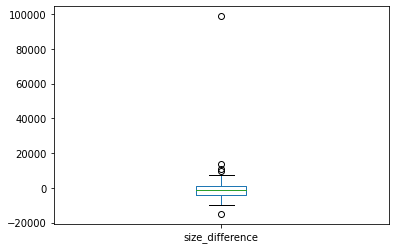

In [80]:
battles['size_difference'].plot.box()

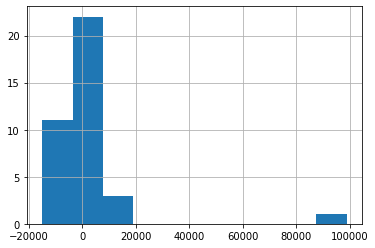

In [81]:
battles['size_difference'].hist()

Claramente o valor máximo distoa muito dos outros valores da coluna, então vamos remover sua linha.

In [82]:
battles = battles[battles['size_difference'] < 40000]

# resetar o index após remover dados
battles.reset_index(drop=True, inplace=True)

battles.shape

(36, 19)

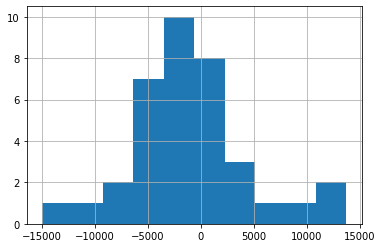

In [83]:
battles['size_difference'].hist()

# Análise Descritiva

In [84]:
battles.head()

,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1,size_difference,size_difference_disc
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,1,0,15000.0,4000.0,1,Golden Tooth,The Westerlands,Jaime Lannister,Clement Piper,11000.0,advantage_2
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,1,ambush,1,0,7713.0,120.0,1,Mummer's Ford,The Riverlands,Gregor Clegane,Beric Dondarrion,7593.0,advantage_2
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,0,1,15000.0,10000.0,1,Riverrun,The Riverlands,Jaime Lannister,Edmure Tully,5000.0,advantage_2
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,0,pitched battle,1,1,18000.0,20000.0,1,Green Fork,The Riverlands,Roose Bolton,Tywin Lannister,-2000.0,disavantage_2
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,1,ambush,1,1,1875.0,6000.0,1,Whispering Wood,The Riverlands,Robb Stark,Jaime Lannister,-4125.0,disavantage_3


In [85]:
import matplotlib.pyplot as plt

## Tamanho das tropas vitoriosas

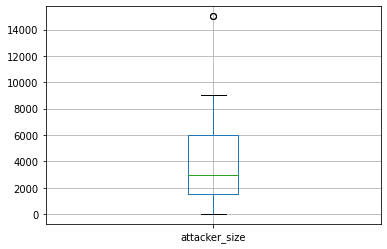

In [86]:
battles[battles['attacker_outcome'] == 1].boxplot(column=['attacker_size'])

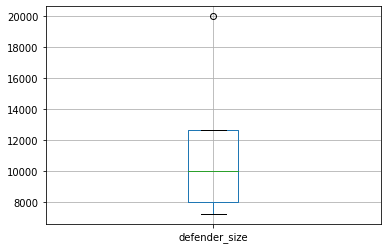

In [87]:
battles[battles['attacker_outcome'] == 0].boxplot(column=['defender_size'])

## Batalhas por ano

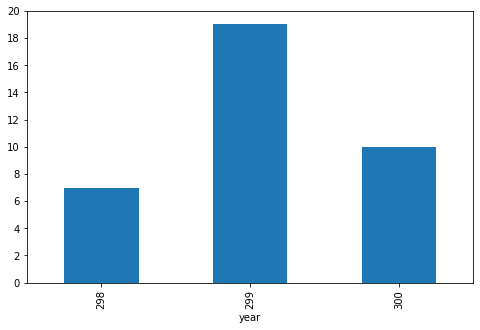

In [88]:
plt.figure(figsize=(8, 5))
battles.groupby(['year'])['name'].count().plot(kind='bar')
max_ytick = battles.groupby(['year'])['name'].count().max() + 2
_ = plt.yticks(np.arange(0, max_ytick, 2), np.arange(0, max_ytick, 2))

## Locais por região

Text(0.5, 1.0, 'Locations by regions')

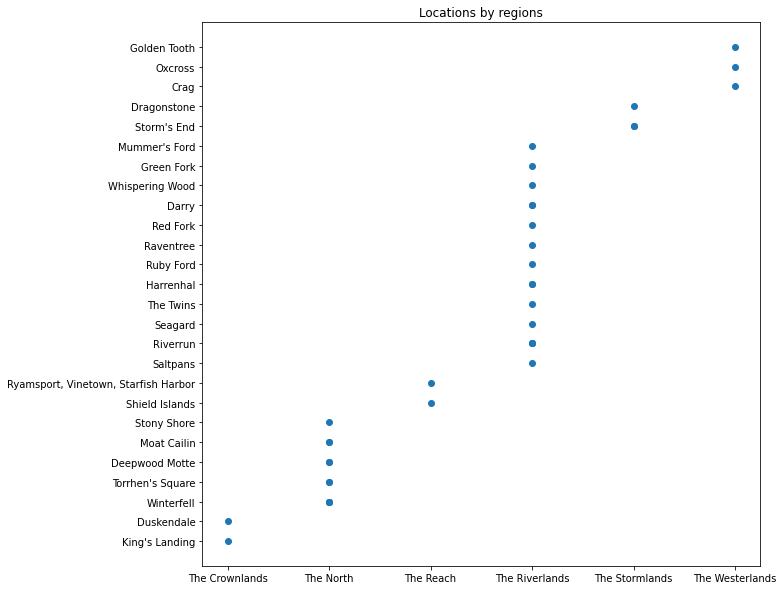

In [89]:
plt.figure(figsize=(10, 10))
plt.scatter(battles.sort_values('region')['region'], battles.sort_values('region')['location'])
plt.title('Locations by regions')

## Distribuição dos tipos de batalha, reis dos atacantes e reis dos defensores

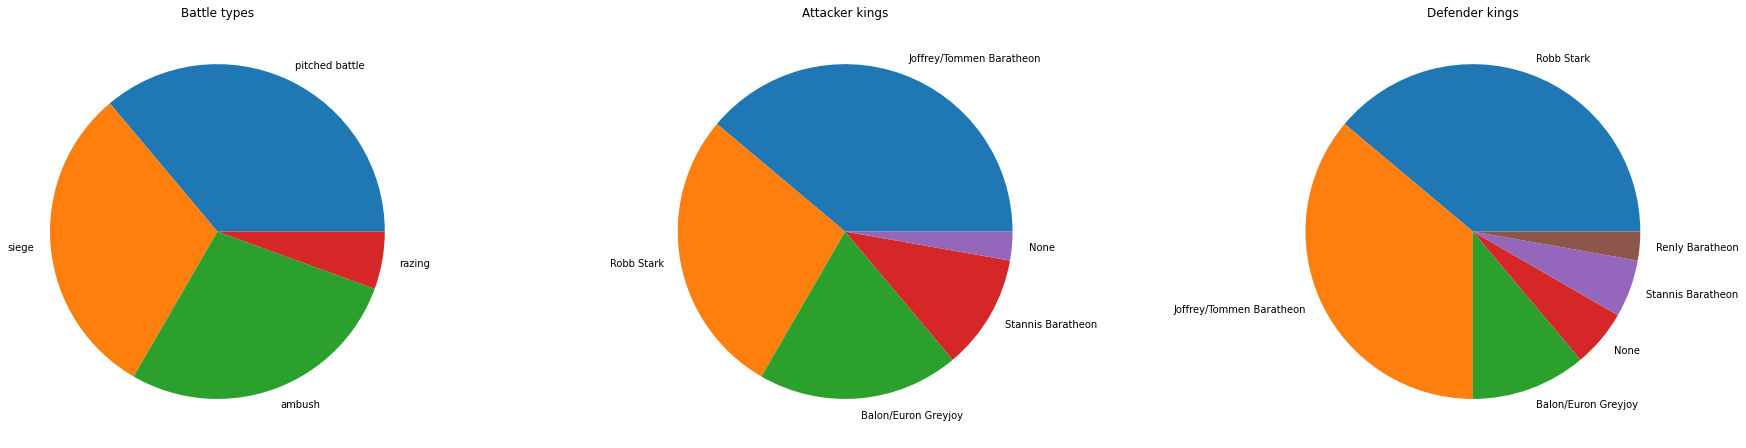

In [90]:
figure, axes = plt.subplots(1, 3, figsize=(30,30))

battles['battle_type'].value_counts().plot(kind='pie', label='', ax=axes[0])
battles['attacker_king'].value_counts().plot(kind='pie', label='', ax=axes[1])
battles['defender_king'].value_counts().plot(kind='pie', label='', ax=axes[2])

axes[0].title.set_text('Battle types')
axes[1].title.set_text('Attacker kings')
axes[2].title.set_text('Defender kings')

plt.subplots_adjust(wspace=0.5)

## Comandantes por casa

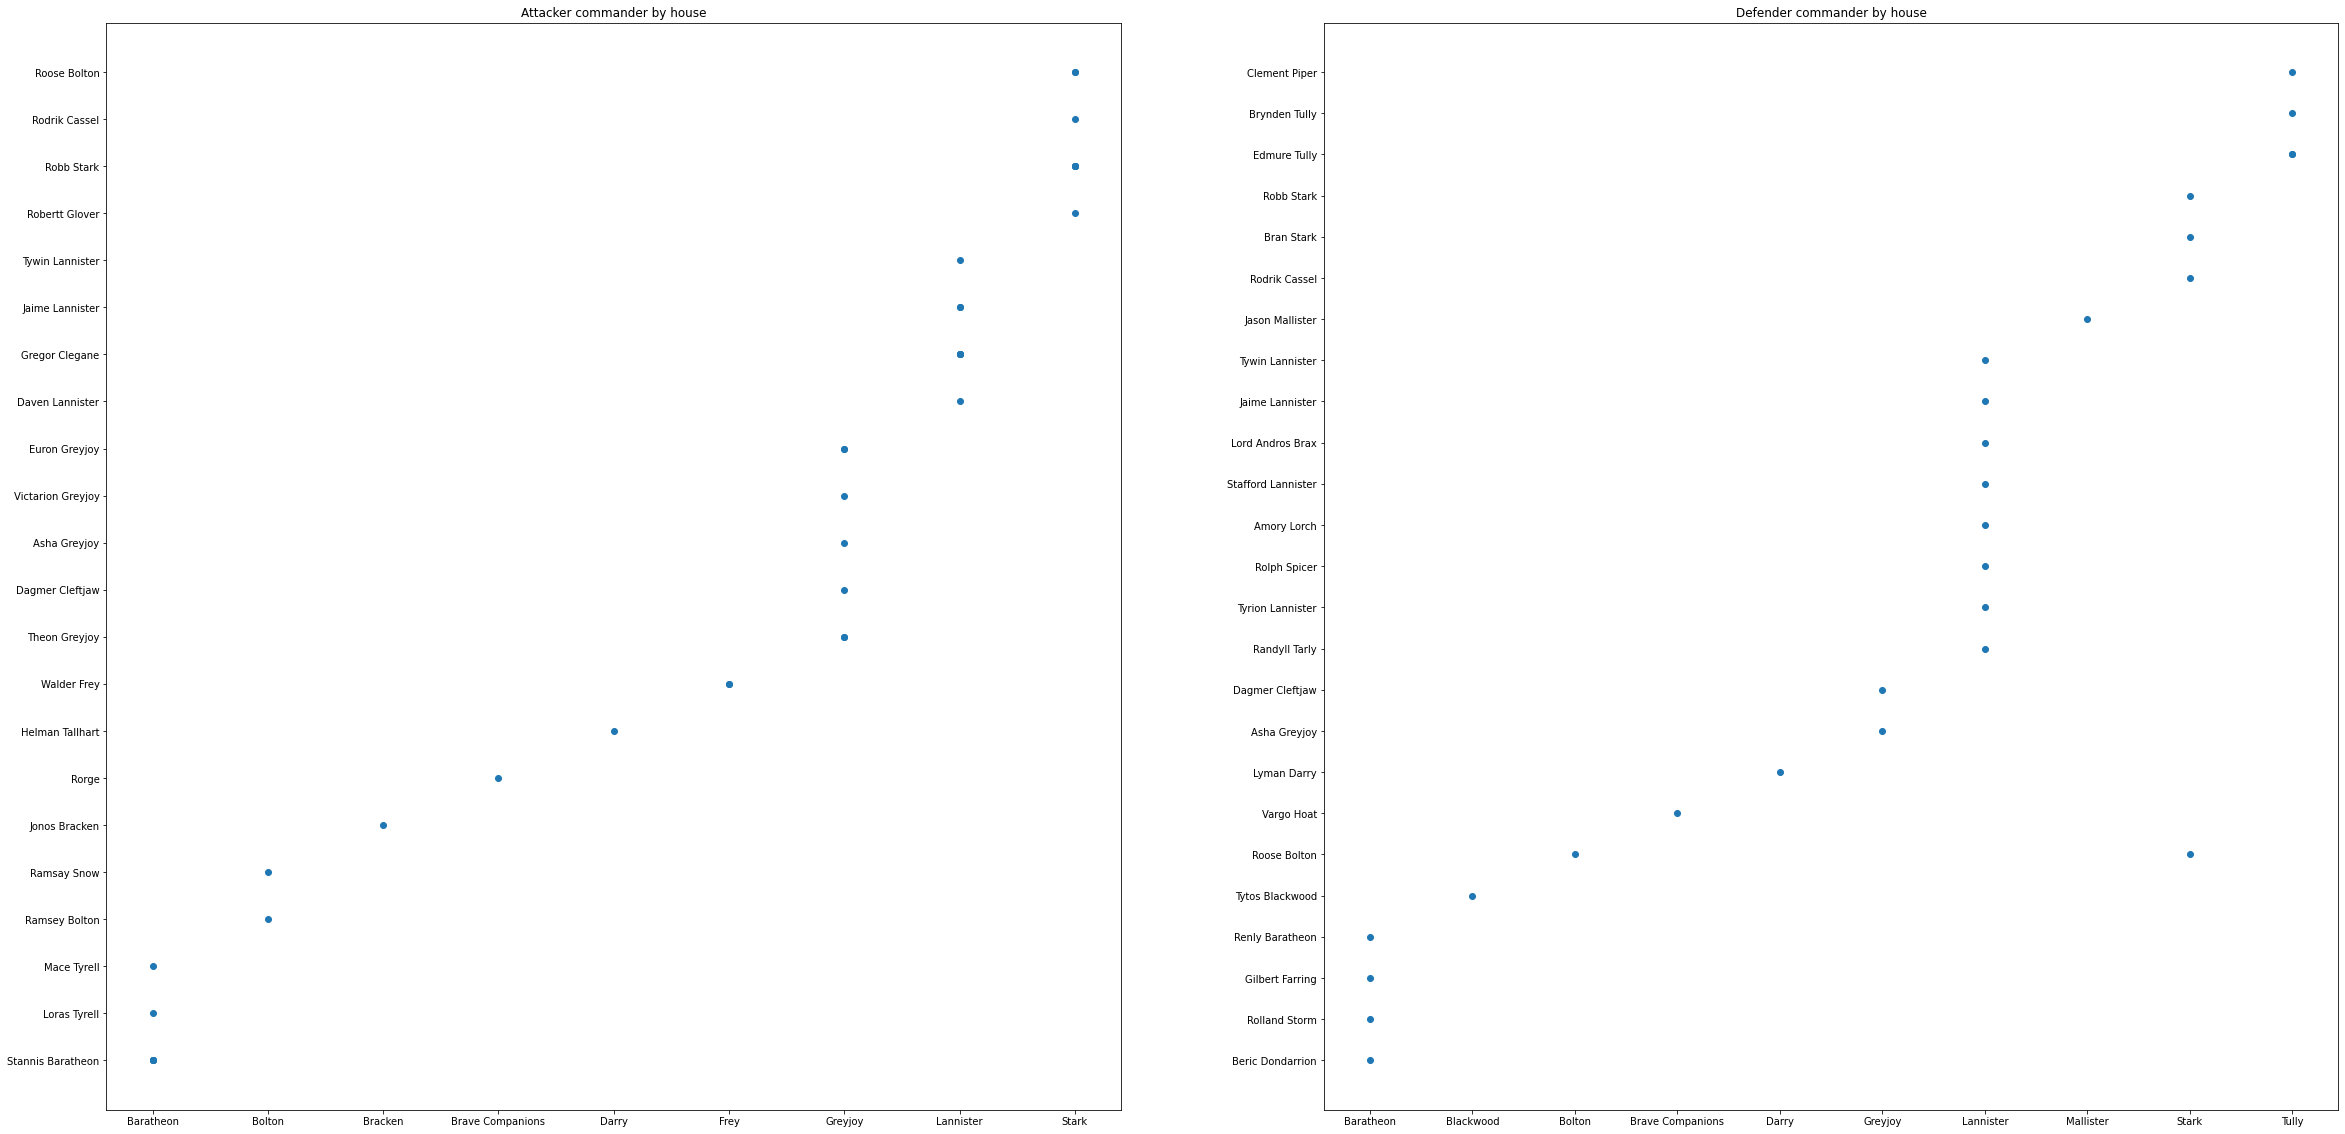

In [91]:
figure, axes = plt.subplots(1, 2, figsize=(40,20))

axes[0].scatter(battles.sort_values('attacker_1')['attacker_1'], battles.sort_values('attacker_1')['attacker_commander_1'])
axes[1].scatter(battles[battles['defender_commander_1'] != 'Unknown'].sort_values('defender_1')['defender_1'], battles[battles['defender_commander_1'] != 'Unknown'].sort_values('defender_1')['defender_commander_1'])

axes[0].title.set_text('Attacker commander by house')
axes[1].title.set_text('Defender commander by house')

## Vitórias

Primeiro vamos unificar as informações de ataque e defesa para poder olhar para as casas como um todo.

In [92]:
houses = np.unique(battles['attacker_1'].cat.categories.to_list() + battles['defender_1'].cat.categories.to_list())
houses

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Greyjoy', 'Lannister', 'Mallister', "Night's Watch", 'None',
       'Stark', 'Tully', 'Tyrell'], dtype='<U27')

In [93]:
# Criar novo data frame
stats_by_house = pd.DataFrame(columns=['house'])
stats_by_house['house'] = houses
stats_by_house.head()

,house
0,Baratheon
1,Blackwood
2,Bolton
3,Bracken
4,Brave Companions


In [94]:
# Adicionar vitórias
for house in houses:
  victories = battles.loc[((battles['attacker_1'] == house) & (battles['attacker_outcome'] == 1)) | ((battles['defender_1'] == house) & (battles['attacker_outcome'] == 0)), ['attacker_outcome']].count().at['attacker_outcome']
  stats_by_house.loc[stats_by_house['house'] == house, ['victories']] = victories

stats_by_house.head()

,house,victories
0,Baratheon,4.0
1,Blackwood,0.0
2,Bolton,3.0
3,Bracken,1.0
4,Brave Companions,1.0


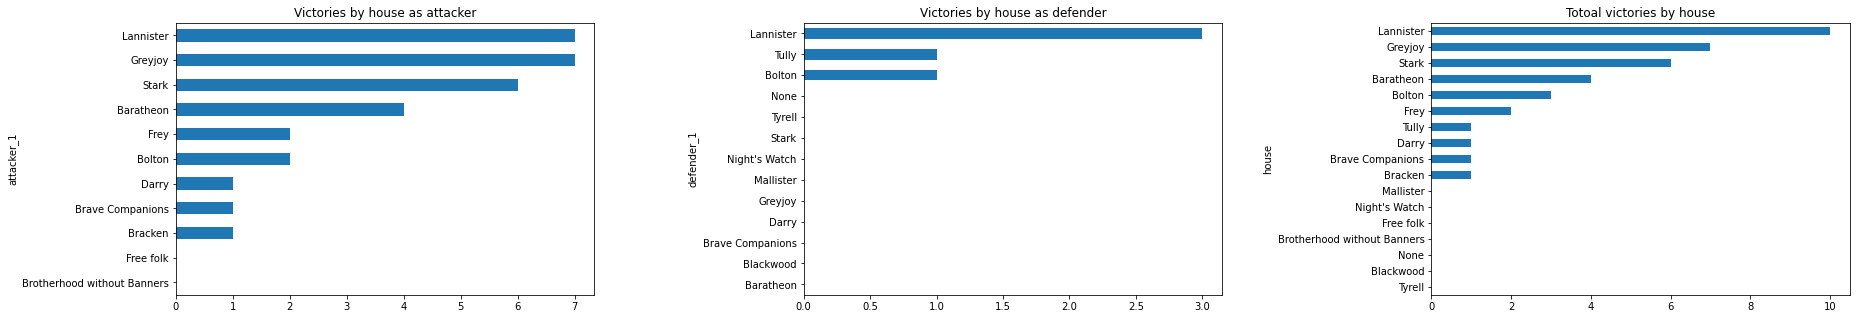

In [95]:
figure, axes = plt.subplots(1, 3, figsize=(30,5))

battles[battles['attacker_outcome'] == 1].groupby(['attacker_1'])['attacker_outcome'].count().sort_values().plot(kind='barh', ax=axes[0])
battles[battles['attacker_outcome'] == 0].groupby(['defender_1'])['attacker_outcome'].count().sort_values().plot(kind='barh', ax=axes[1])
stats_by_house.groupby(['house'])['victories'].sum().sort_values().plot(kind='barh', ax=axes[2])

axes[0].title.set_text('Victories by house as attacker')
axes[1].title.set_text('Victories by house as defender')
axes[2].title.set_text('Totoal victories by house')

plt.subplots_adjust(wspace=0.5)

Podemos ver que na grande maioria das batalhas o atacante venceu. E a casa Lannister é a casa que mais ganhou batalhas (tanto como atacante quanto como defensor).

# Teste de Hipótese

In [96]:
from scipy import stats

## O tamanho médio das tropas das casas que mais venceram batalhas é igual

In [97]:
# As duas casas que mais venceram batalhas
stats_by_house.sort_values('victories', ascending=False).head(2)

,house,victories
10,Lannister,10.0
9,Greyjoy,7.0


In [98]:
# Lannister
lannister_as_attacker = battles.loc[(battles['attacker_1'] == 'Lannister') & (battles['attacker_outcome'] == 1), ['attacker_size']]
lannister_as_attacker['size'] = lannister_as_attacker['attacker_size']
lannister_as_attacker.drop(columns=['attacker_size'], inplace=True)

lannister_as_defender = battles.loc[(battles['defender_1'] == 'Lannister') & (battles['attacker_outcome'] == 0), ['defender_size']]
lannister_as_defender['size'] = lannister_as_defender['defender_size']
lannister_as_defender.drop(columns=['defender_size'], inplace=True)

lannister = lannister_as_attacker.copy()
lannister = lannister.append(lannister_as_defender, ignore_index=True)

lannister.head()

,size
0,15000.0
1,7713.0
2,15000.0
3,9020.0
4,7141.0


In [99]:
# Greyjoy
greyjoy_as_attacker = battles.loc[(battles['attacker_1'] == 'Greyjoy') & (battles['attacker_outcome'] == 1), ['attacker_size']]
greyjoy_as_attacker['size'] = greyjoy_as_attacker['attacker_size']
greyjoy_as_attacker.drop(columns=['attacker_size'], inplace=True)

greyjoy_as_defender = battles.loc[(battles['defender_1'] == 'Greyjoy') & (battles['attacker_outcome'] == 0), ['defender_size']]
greyjoy_as_defender['size'] = greyjoy_as_defender['defender_size']
greyjoy_as_defender.drop(columns=['defender_size'], inplace=True)

greyjoy = greyjoy_as_attacker.copy()
greyjoy = greyjoy.append(greyjoy_as_defender, ignore_index=True)

greyjoy.head()

,size
0,3708.0
1,1000.0
2,264.0
3,20.0
4,5397.0


H0: A média do tamanho das tropas é igual

H1: A média do tamanho das tropas é diferente

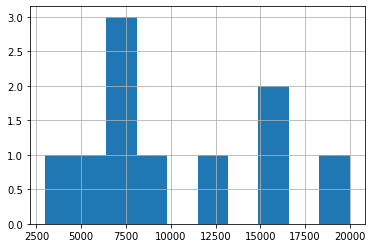

In [100]:
lannister['size'].hist()

In [101]:
stats.shapiro(lannister['size'])

ShapiroResult(statistic=0.938037097454071, pvalue=0.5313857793807983)

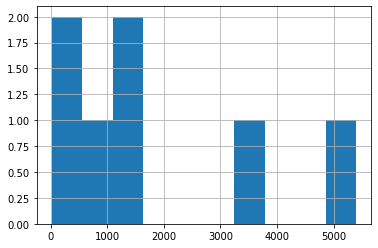

In [102]:
greyjoy['size'].hist()

In [103]:
stats.shapiro(greyjoy['size'])

ShapiroResult(statistic=0.878543496131897, pvalue=0.2200610339641571)

Utilizando um valor crítico de 0.05 (5%), podemos considerar que as duas distribuições seguem a normal.

Sendo assim, usaremos o `t-Test` não pareado para seguir com nosso test de hipótese.

In [104]:
stats.ttest_ind(lannister['size'], greyjoy['size'])

Ttest_indResult(statistic=4.04501390016186, pvalue=0.0010579562292701596)

Como o `pvalue` é menor do que o valor crítico de 0.05, a hipótese nula foi rejeitada. Isso significa que, apesar de Lannister e Greyjoy seream as casas com mais vitórias, o tamanho médio de suas tropas não são iguais.

## As batalhas que ocorreram durante o verão foram maiores do que as demais

Para prosseguir com esse test de hipótese precisamos primeiro criar uma nova coluna para termos o tamanho total da batalha.

In [105]:
battles['total_size'] = battles.loc[:,['attacker_size','defender_size']].sum(axis=1)
battles.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,year,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_commander_1,defender_commander_1,size_difference,size_difference_disc,total_size
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,1,0,15000.0,4000.0,1,Golden Tooth,The Westerlands,Jaime Lannister,Clement Piper,11000.0,advantage_2,19000.0
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,1,ambush,1,0,7713.0,120.0,1,Mummer's Ford,The Riverlands,Gregor Clegane,Beric Dondarrion,7593.0,advantage_2,7833.0
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,1,pitched battle,0,1,15000.0,10000.0,1,Riverrun,The Riverlands,Jaime Lannister,Edmure Tully,5000.0,advantage_2,25000.0
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,0,pitched battle,1,1,18000.0,20000.0,1,Green Fork,The Riverlands,Roose Bolton,Tywin Lannister,-2000.0,disavantage_2,38000.0
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,1,ambush,1,1,1875.0,6000.0,1,Whispering Wood,The Riverlands,Robb Stark,Jaime Lannister,-4125.0,disavantage_3,7875.0


H0: A média do tamanho das batalhas foi igual para o verão e as demais estações

H1: A média do tamanho das batalhas foi maior durante o verão

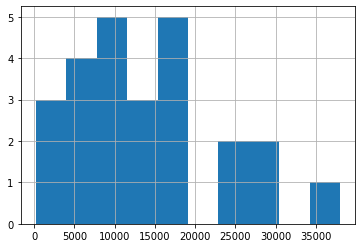

In [106]:
battles[battles['summer'] == 1]['total_size'].hist()

In [107]:
stats.shapiro(battles[battles['summer'] == 1]['total_size'])

ShapiroResult(statistic=0.9409182667732239, pvalue=0.15543711185455322)

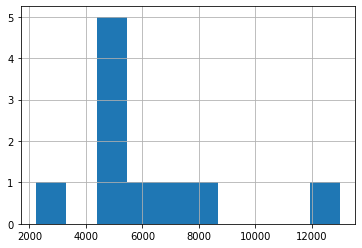

In [108]:
battles[battles['summer'] == 0]['total_size'].hist()

In [109]:
stats.shapiro(battles[battles['summer'] == 0]['total_size'])

ShapiroResult(statistic=0.8379897475242615, pvalue=0.04174250736832619)

Utilizando um valor crítico de 0.05 (5%), podemos considerar que a primeira distribuição segue a normal, mas a segunda não.

Sendo assim, usaremos o `Mann-Whitney U Test` para seguir com nosso test de hipótese.

In [110]:
stats.mannwhitneyu(battles[battles['summer'] == 1]['total_size'], battles[battles['summer'] == 0]['total_size'], alternative='greater')

MannwhitneyuResult(statistic=197.0, pvalue=0.0045139777576079865)

Como o `pvalue` é menor do que o valor crítico de 0.05, a hipótese nula foi rejeitada. Isso significa que, em média, as batalhas que ocorreram durante o verão foram maiores do que aquelas que ocorreram nas outras estações.